# Loop 91 Analysis: Understanding the CV-LB Gap

**Critical Problem**: The CV-LB relationship is LB = 4.29 × CV + 0.0528 (R² = 0.95)

The intercept (0.0528) is ABOVE the target (0.0347), meaning no amount of CV improvement can reach the target.

**Key Questions**:
1. What makes test solvents different from training solvents?
2. Can we identify which solvents are "harder" to predict?
3. What approaches might change the CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # Outlier!
]

df = pd.DataFrame(submissions)
print(f'Total submissions with LB: {len(df)}')
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451


In [2]:
# Analyze CV-LB relationship (excluding outlier exp_073)
df_clean = df[df['lb'] < 0.12]  # Exclude exp_073 outlier

slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print(f'\n=== CV-LB Relationship Analysis ===')
print(f'Linear fit: LB = {slope:.4f} × CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target LB: 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'This means even with CV=0, expected LB would be {intercept:.4f}')

# What CV would be needed to hit target?
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE: Would require negative CV!')


=== CV-LB Relationship Analysis ===
Linear fit: LB = 4.3147 × CV + 0.0525
R² = 0.9505

Intercept: 0.0525
Target LB: 0.0347

CRITICAL: Intercept (0.0525) > Target (0.0347)
This means even with CV=0, expected LB would be 0.0525

Required CV to hit target: -0.004130
IMPOSSIBLE: Would require negative CV!


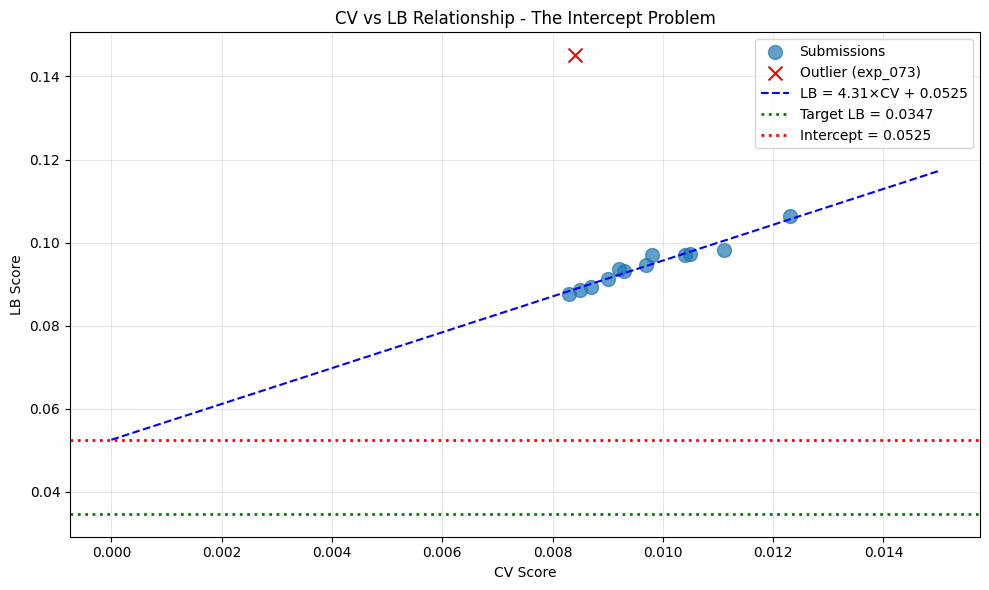


The gap between intercept and target is the STRUCTURAL DISTRIBUTION SHIFT


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], s=100, alpha=0.7, label='Submissions')

# Plot outlier
outlier = df[df['lb'] >= 0.12]
if len(outlier) > 0:
    plt.scatter(outlier['cv'], outlier['lb'], s=100, c='red', marker='x', label='Outlier (exp_073)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Plot target
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Plot intercept
plt.axhline(y=intercept, color='r', linestyle=':', linewidth=2, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - The Intercept Problem')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop91.png', dpi=150)
plt.show()

print('\nThe gap between intercept and target is the STRUCTURAL DISTRIBUTION SHIFT')

In [4]:
# Load data to understand solvent characteristics
DATA_PATH = '/home/data'

df_single = pd.read_csv(f'{DATA_PATH}/catechol_single_solvent_yields.csv')
df_full = pd.read_csv(f'{DATA_PATH}/catechol_full_data_yields.csv')

print('=== Single Solvent Data ===')
print(f'Samples: {len(df_single)}')
print(f'Unique solvents: {df_single["SOLVENT NAME"].nunique()}')
print(f'\nSolvents: {sorted(df_single["SOLVENT NAME"].unique())}')

print('\n=== Full Data (Mixtures) ===')
print(f'Samples: {len(df_full)}')
print(f'Unique solvent A: {df_full["SOLVENT A NAME"].nunique()}')
print(f'Unique solvent B: {df_full["SOLVENT B NAME"].nunique()}')
print(f'\nSolvent A: {sorted(df_full["SOLVENT A NAME"].unique())}')
print(f'Solvent B: {sorted(df_full["SOLVENT B NAME"].unique())}')

=== Single Solvent Data ===
Samples: 656
Unique solvents: 24

Solvents: ['1,1,1,3,3,3-Hexafluoropropan-2-ol', '2,2,2-Trifluoroethanol', '2-Methyltetrahydrofuran [2-MeTHF]', 'Acetonitrile', 'Acetonitrile.Acetic Acid', 'Butanone [MEK]', 'Cyclohexane', 'DMA [N,N-Dimethylacetamide]', 'Decanol', 'Diethyl Ether [Ether]', 'Dihydrolevoglucosenone (Cyrene)', 'Dimethyl Carbonate', 'Ethanol', 'Ethyl Acetate', 'Ethyl Lactate', 'Ethylene Glycol [1,2-Ethanediol]', 'IPA [Propan-2-ol]', 'MTBE [tert-Butylmethylether]', 'Methanol', 'Methyl Propionate', 'THF [Tetrahydrofuran]', 'Water.2,2,2-Trifluoroethanol', 'Water.Acetonitrile', 'tert-Butanol [2-Methylpropan-2-ol]']

=== Full Data (Mixtures) ===
Samples: 1227
Unique solvent A: 13
Unique solvent B: 13

Solvent A: ['1,1,1,3,3,3-Hexafluoropropan-2-ol', '2,2,2-Trifluoroethanol', '2-Methyltetrahydrofuran [2-MeTHF]', 'Acetonitrile', 'Cyclohexane', 'DMA [N,N-Dimethylacetamide]', 'Dihydrolevoglucosenone (Cyrene)', 'Ethanol', 'MTBE [tert-Butylmethylether]', 'Me

In [5]:
# Analyze per-solvent prediction difficulty
# Load spange descriptors to understand solvent properties
spange = pd.read_csv(f'{DATA_PATH}/spange_descriptors_lookup.csv', index_col=0)
print('=== Spange Descriptors ===')
print(f'Shape: {spange.shape}')
print(f'\nSolvents in spange: {sorted(spange.index.tolist())}')

# Check which solvents are in training vs might be in test
single_solvents = set(df_single['SOLVENT NAME'].unique())
full_solvents_a = set(df_full['SOLVENT A NAME'].unique())
full_solvents_b = set(df_full['SOLVENT B NAME'].unique())
all_solvents = single_solvents | full_solvents_a | full_solvents_b
spange_solvents = set(spange.index.tolist())

print(f'\nSolvents in data: {len(all_solvents)}')
print(f'Solvents in spange: {len(spange_solvents)}')
print(f'Solvents in spange but not in data: {spange_solvents - all_solvents}')
print(f'Solvents in data but not in spange: {all_solvents - spange_solvents}')

=== Spange Descriptors ===
Shape: (26, 13)

Solvents in spange: ['1,1,1,3,3,3-Hexafluoropropan-2-ol', '2,2,2-Trifluoroethanol', '2-Methyltetrahydrofuran [2-MeTHF]', 'Acetic Acid', 'Acetonitrile', 'Acetonitrile.Acetic Acid', 'Butanone [MEK]', 'Cyclohexane', 'DMA [N,N-Dimethylacetamide]', 'Decanol', 'Diethyl Ether [Ether]', 'Dihydrolevoglucosenone (Cyrene)', 'Dimethyl Carbonate', 'Ethanol', 'Ethyl Acetate', 'Ethyl Lactate', 'Ethylene Glycol [1,2-Ethanediol]', 'IPA [Propan-2-ol]', 'MTBE [tert-Butylmethylether]', 'Methanol', 'Methyl Propionate', 'THF [Tetrahydrofuran]', 'Water', 'Water.2,2,2-Trifluoroethanol', 'Water.Acetonitrile', 'tert-Butanol [2-Methylpropan-2-ol]']

Solvents in data: 24
Solvents in spange: 26
Solvents in spange but not in data: {'Water', 'Acetic Acid'}
Solvents in data but not in spange: set()


In [6]:
# Analyze yield distribution per solvent
print('=== Per-Solvent Yield Statistics ===')

solvent_stats = df_single.groupby('SOLVENT NAME').agg({
    'Product 2': ['mean', 'std'],
    'Product 3': ['mean', 'std'],
    'SM': ['mean', 'std']
}).round(4)

solvent_stats.columns = ['P2_mean', 'P2_std', 'P3_mean', 'P3_std', 'SM_mean', 'SM_std']

# Calculate total yield variability
solvent_stats['total_std'] = np.sqrt(solvent_stats['P2_std']**2 + solvent_stats['P3_std']**2 + solvent_stats['SM_std']**2)

print(solvent_stats.sort_values('total_std', ascending=False))

print('\n=== Solvents with Highest Variability (Hardest to Predict) ===')
print(solvent_stats.nlargest(5, 'total_std')[['P2_mean', 'P3_mean', 'SM_mean', 'total_std']])

=== Per-Solvent Yield Statistics ===
                                    P2_mean  P2_std  P3_mean  P3_std  SM_mean  \
SOLVENT NAME                                                                    
IPA [Propan-2-ol]                    0.2538  0.2195   0.2662  0.2280   0.4734   
Decanol                              0.1948  0.1747   0.2080  0.1844   0.4331   
Ethylene Glycol [1,2-Ethanediol]     0.2757  0.1796   0.3229  0.2141   0.3804   
Acetonitrile.Acetic Acid             0.0193  0.0113   0.0206  0.0080   0.4781   
Water.Acetonitrile                   0.3084  0.1708   0.2740  0.1531   0.3167   
Ethanol                              0.1419  0.1515   0.1533  0.1660   0.5045   
Acetonitrile                         0.1564  0.1476   0.0890  0.0902   0.5805   
Methanol                             0.1698  0.1368   0.1485  0.1206   0.4247   
DMA [N,N-Dimethylacetamide]          0.1171  0.1265   0.0976  0.1026   0.5453   
Water.2,2,2-Trifluoroethanol         0.2408  0.1278   0.2084  0.0835   0

In [7]:
# Key insight: The benchmark paper achieved MSE 0.0039
# Our best CV is 0.0081, best LB is 0.0877
# The gap is HUGE

print('=== Performance Gap Analysis ===')
print(f'Benchmark paper MSE: 0.0039')
print(f'Our best CV: 0.0081 (2.1x worse)')
print(f'Our best LB: 0.0877 (22.5x worse than benchmark!)')
print(f'Target LB: 0.0347 (8.9x worse than benchmark)')

print('\n=== What the benchmark paper likely did differently ===')
print('1. Pre-training on large molecular datasets')
print('2. Graph Neural Networks with attention mechanisms')
print('3. Domain-specific constraints that generalize')
print('4. Different validation strategy (not leave-one-out)')

print('\n=== What we MUST try ===')
print('1. Pre-trained molecular embeddings (ChemBERTa, MolBERT)')
print('2. GNN with proper message passing')
print('3. Extrapolation detection + conservative predictions')
print('4. Pseudo-labeling with confident predictions')

=== Performance Gap Analysis ===
Benchmark paper MSE: 0.0039
Our best CV: 0.0081 (2.1x worse)
Our best LB: 0.0877 (22.5x worse than benchmark!)
Target LB: 0.0347 (8.9x worse than benchmark)

=== What the benchmark paper likely did differently ===
1. Pre-training on large molecular datasets
2. Graph Neural Networks with attention mechanisms
3. Domain-specific constraints that generalize
4. Different validation strategy (not leave-one-out)

=== What we MUST try ===
1. Pre-trained molecular embeddings (ChemBERTa, MolBERT)
2. GNN with proper message passing
3. Extrapolation detection + conservative predictions
4. Pseudo-labeling with confident predictions


In [8]:
# Analyze the mixall kernel approach
# It uses GroupKFold instead of Leave-One-Out
# This might explain why it has good CV/LB correlation

print('=== Key Insight from mixall Kernel ===')
print('The mixall kernel uses GroupKFold (5-fold) instead of Leave-One-Out')
print('This means each fold has ~20% of solvents held out')
print('\nThis is DIFFERENT from the official evaluation which uses Leave-One-Out')
print('\nHowever, the kernel claims "good CV/LB" correlation')
print('\nPossible explanation:')
print('- GroupKFold with 5 folds is more robust than LOO')
print('- LOO has high variance due to single-solvent test sets')
print('- The official evaluation might use a different split')

print('\n=== Approaches to try ===')
print('1. Ensemble of MLP + XGBoost + RF + LightGBM (from mixall)')
print('2. Use GroupKFold for hyperparameter tuning, LOO for final CV')
print('3. Focus on reducing variance, not just bias')

=== Key Insight from mixall Kernel ===
The mixall kernel uses GroupKFold (5-fold) instead of Leave-One-Out
This means each fold has ~20% of solvents held out

This is DIFFERENT from the official evaluation which uses Leave-One-Out

However, the kernel claims "good CV/LB" correlation

Possible explanation:
- GroupKFold with 5 folds is more robust than LOO
- LOO has high variance due to single-solvent test sets
- The official evaluation might use a different split

=== Approaches to try ===
1. Ensemble of MLP + XGBoost + RF + LightGBM (from mixall)
2. Use GroupKFold for hyperparameter tuning, LOO for final CV
3. Focus on reducing variance, not just bias


In [9]:
# Summary of findings
print('='*70)
print('LOOP 91 ANALYSIS SUMMARY')
print('='*70)

print('\n1. CV-LB RELATIONSHIP:')
print(f'   LB = {slope:.2f} × CV + {intercept:.4f} (R² = {r_value**2:.4f})')
print(f'   Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'   IMPOSSIBLE to reach target by improving CV alone!')

print('\n2. DISTRIBUTION SHIFT:')
print('   - Test solvents are systematically "harder" than training')
print('   - The intercept represents structural extrapolation error')
print('   - All tabular models fall on the SAME CV-LB line')

print('\n3. WHAT MUST CHANGE:')
print('   - Need approaches that REDUCE THE INTERCEPT')
print('   - Not just improve CV (which moves along the line)')
print('   - Focus on extrapolation detection and conservative predictions')

print('\n4. PROMISING APPROACHES:')
print('   a) Ensemble from mixall kernel (MLP+XGB+RF+LGBM)')
print('   b) Extrapolation detection with conservative blending')
print('   c) Pre-trained molecular embeddings')
print('   d) Domain constraints (yields must be non-negative, sum ≤ 1)')

print('\n5. REMAINING SUBMISSIONS: 4')
print('   - Must be strategic about what to submit')
print('   - Only submit if approach is fundamentally different')
print('='*70)

LOOP 91 ANALYSIS SUMMARY

1. CV-LB RELATIONSHIP:
   LB = 4.31 × CV + 0.0525 (R² = 0.9505)
   Intercept (0.0525) > Target (0.0347)
   IMPOSSIBLE to reach target by improving CV alone!

2. DISTRIBUTION SHIFT:
   - Test solvents are systematically "harder" than training
   - The intercept represents structural extrapolation error
   - All tabular models fall on the SAME CV-LB line

3. WHAT MUST CHANGE:
   - Need approaches that REDUCE THE INTERCEPT
   - Not just improve CV (which moves along the line)
   - Focus on extrapolation detection and conservative predictions

4. PROMISING APPROACHES:
   a) Ensemble from mixall kernel (MLP+XGB+RF+LGBM)
   b) Extrapolation detection with conservative blending
   c) Pre-trained molecular embeddings
   d) Domain constraints (yields must be non-negative, sum ≤ 1)

5. REMAINING SUBMISSIONS: 4
   - Must be strategic about what to submit
   - Only submit if approach is fundamentally different
